<a href="https://colab.research.google.com/github/amballa-mahesh/NLP_fake_news_classifier_word2vec/blob/main/NLP_fake_news_classifier_word2vec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/mydrive')

Mounted at /content/mydrive


In [2]:
import pandas as pd

Reading Data Using Pandas

In [219]:
df = pd.read_csv('/content/mydrive/MyDrive/Fake News Data/train.csv')

In [221]:
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [222]:
df.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

Removing Null Data

In [223]:
df.dropna(inplace =True,axis=0)
df.reset_index(inplace=True)

In [224]:
df.isnull().sum()

index     0
id        0
title     0
author    0
text      0
label     0
dtype: int64

In [225]:
df.shape

(18285, 6)

In [226]:
df.head()

,index,id,title,author,text,label
0,0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [269]:
df['label'].value_counts()

0    10361
1     7924
Name: label, dtype: int64

In [273]:
import re
import string
from tqdm import tqdm
import nltk
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
from nltk.corpus import stopwords 
from nltk import word_tokenize,sent_tokenize
from nltk.stem import PorterStemmer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [274]:
stops = stopwords.words('english')
lm = WordNetLemmatizer()
ps = PorterStemmer()

In [ ]:
stops

Removing some words from the stop words

```
# This is formatted as code
```



In [277]:
stops.remove('no')
stops.remove('not')
stops.remove('nor')

Creating X,Y

In [280]:
y = df['label']

In [279]:
x = df.drop(columns='label',axis =1)

# Cleaning the text data and building words corpus

In [281]:
from nltk.corpus.reader import wordlist
corpus = []
for i in tqdm(range(0,x.shape[0])):
  text = re.sub(r"didn't", "did not", df['text'][i])
  text = re.sub(r"don't", "do not", text)
  text = re.sub(r"won't", "will not", text)
  text = re.sub(r"can't", "can not", text)
  text = re.sub(r"wasn't", "do not", text)
  text = re.sub(r"should't", "should not", text)
  text = re.sub(r"could't", "could not", text)  
  text = re.sub(r"\'ve", " have", text)
  text = re.sub(r"\'m", " am", text)
  text = re.sub(r"\'ll", " will", text)
  text = re.sub(r"\'re", " are", text)
  text = re.sub(r"\'s", " is", text)
  text = re.sub(r"\'d", " would", text)
  text = re.sub(r"\'t", " not", text)
  text = re.sub(r"\'m", " am", text)
  text = re.sub(r"n\'t", " not", text)
  text = re.sub('[^a-zA-Z]',' ',text)
  text = text.lower()
  text = text.split()
  text = [ps.stem(word) for word in text if word not in stops]
  text = ' '.join(text)
  corpus.append(text)
word_corpus = []
for sent in tqdm(corpus):
  sent_token = sent_tokenize(sent)
  for sen in sent_token:
    words = word_tokenize(sen)
  word_corpus.append(words)



100%|██████████| 18285/18285 [00:41<00:00, 439.10it/s]


In [ ]:
word_corpus[0:2]

In [283]:
len(word_corpus)

18285

In [121]:
!pip install gensim

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [284]:
import gensim
print(gensim.__version__)


4.3.1


# Creating the Gensim Model - CBOW (sg=0)

In [285]:
model = gensim.models.Word2Vec(word_corpus, vector_size =100,min_count = 2, epochs=10,window=5,sg =0)

In [286]:
model.vector_size

100

In [287]:
model.wv.vectors.shape

(61396, 100)

In [288]:
model.wv.similar_by_word('good')

[('bad', 0.7997437119483948),
 ('great', 0.6713140606880188),
 ('better', 0.6401640176773071),
 ('decent', 0.5829967260360718),
 ('wise', 0.5636752247810364),
 ('plenti', 0.5626820921897888),
 ('import', 0.5613107681274414),
 ('want', 0.5511077642440796),
 ('best', 0.5497318506240845),
 ('know', 0.5471676588058472)]

In [289]:
import numpy as np

# *Creating Average Word to Vec for all similar shaped vectors*

In [290]:
def avgword2vec(doc):
  return np.mean([model.wv[word] for word in doc if word in model.wv.index_to_key],axis =0)


**Creating Avg word 2 vec Vectors with size 100.**

In [291]:
X = []
for i in tqdm(range(len(word_corpus))):
  X.append(avgword2vec(word_corpus[i]))

100%|██████████| 18285/18285 [22:42<00:00, 13.42it/s]


In [292]:
y.shape

(18285,)

In [293]:
len(X)

18285

We are using Minmaxscaler for creating all the postive value vectors as error popping while use using the raw negative values....

In [294]:
from sklearn.preprocessing import MinMaxScaler

In [295]:
scaler = MinMaxScaler()

In [296]:
scaler.fit(X)

MinMaxScaler()

In [297]:
x_scaled = scaler.transform(X)

In [298]:
len(x_scaled)

18285

In [299]:
x_scaled[0][0]

0.5526191508142837

In [301]:
from sklearn.model_selection import train_test_split

In [302]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size= 0.2, stratify = y,random_state = 123)

In [303]:
len(x_train),len(x_test),len(y_train),len(y_test)

(14628, 3657, 14628, 3657)

In [304]:
x_train[0]

array([0.6315203 , 0.51056012, 0.6599488 , 0.52293541, 0.56686616,
       0.73195456, 0.6453194 , 0.60294281, 0.39744141, 0.44561372,
       0.47714045, 0.43553472, 0.46146379, 0.37507537, 0.48121881,
       0.54774131, 0.17532875, 0.50873277, 0.62433925, 0.73516725,
       0.43654435, 0.71935339, 0.78321363, 0.47701075, 0.40156237,
       0.61344495, 0.64132658, 0.44489167, 0.2737332 , 0.58055689,
       0.4515529 , 0.35699598, 0.55771219, 0.3915248 , 0.49462583,
       0.48533492, 0.45641105, 0.27472348, 0.40216229, 0.57154926,
       0.47063442, 0.63226335, 0.52766564, 0.48005711, 0.81318864,
       0.2532545 , 0.7379514 , 0.6308383 , 0.4805917 , 0.51877213,
       0.48357256, 0.73504753, 0.40637696, 0.40622955, 0.4034312 ,
       0.30076913, 0.51944581, 0.31368014, 0.59645777, 0.6856913 ,
       0.66205438, 0.65106078, 0.62327583, 0.41264163, 0.49797859,
       0.69022646, 0.35516698, 0.47054757, 0.48049826, 0.38754256,
       0.59835658, 0.61327299, 0.54688935, 0.42823975, 0.17181

In [305]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
import math
from sklearn.metrics import roc_curve,auc, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Creating Model using MultinomialNB and GridSearchCV

In [306]:
l =[0.5,0.5]
alphas = np.array([0.0001,0.001,0.01,0.1,1,10,100,1000,10000])
param_grid = {'alpha':alphas}
estimator = MultinomialNB(class_prior = l,fit_prior = False)
neigh = GridSearchCV(estimator,param_grid,scoring='roc_auc',cv = 5,return_train_score=True,verbose=4)
neigh.fit(x_train,y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5] END ..alpha=0.0001;, score=(train=0.900, test=0.907) total time=   0.0s
[CV 2/5] END ..alpha=0.0001;, score=(train=0.902, test=0.895) total time=   0.0s
[CV 3/5] END ..alpha=0.0001;, score=(train=0.900, test=0.911) total time=   0.0s
[CV 4/5] END ..alpha=0.0001;, score=(train=0.902, test=0.896) total time=   0.0s
[CV 5/5] END ..alpha=0.0001;, score=(train=0.902, test=0.894) total time=   0.0s
[CV 1/5] END ...alpha=0.001;, score=(train=0.900, test=0.907) total time=   0.0s
[CV 2/5] END ...alpha=0.001;, score=(train=0.902, test=0.895) total time=   0.0s
[CV 3/5] END ...alpha=0.001;, score=(train=0.900, test=0.911) total time=   0.0s
[CV 4/5] END ...alpha=0.001;, score=(train=0.902, test=0.896) total time=   0.0s
[CV 5/5] END ...alpha=0.001;, score=(train=0.902, test=0.894) total time=   0.0s
[CV 1/5] END ....alpha=0.01;, score=(train=0.900, test=0.907) total time=   0.0s
[CV 2/5] END ....alpha=0.01;, score=(train=0.902,

GridSearchCV(cv=5,
             estimator=MultinomialNB(class_prior=[0.5, 0.5], fit_prior=False),
             param_grid={'alpha': array([1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03,
       1.e+04])},
             return_train_score=True, scoring='roc_auc', verbose=4)

In [308]:
results = pd.DataFrame.from_dict(neigh.cv_results_)

In [309]:
best_param = results['param_alpha']
train_auc  = results['mean_train_score']
test_auc   = results['mean_test_score']
log_alphas = []
for i in range(0,len(best_param)):
  value = math.log10(best_param[i])
  log_alphas.append(value)
log_alphas.sort()

In [310]:
neigh.best_params_['alpha']

0.0001

Accuracy Graph by alphas values

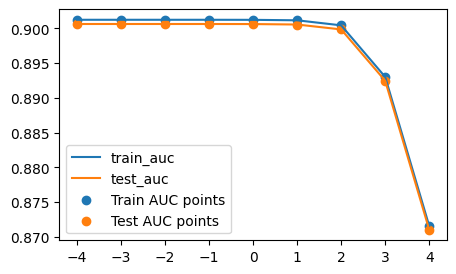

{'alpha': 0.0001}
0.9006210672768775
best alpha log value-   -4.0


In [311]:
plt.figure(figsize=(5,3))
plt.plot(log_alphas,train_auc,label = 'train_auc')
plt.plot(log_alphas,test_auc, label = 'test_auc')
plt.scatter(log_alphas, train_auc, label='Train AUC points')
plt.scatter(log_alphas, test_auc, label='Test AUC points')
plt.legend()
plt.show()
print(neigh.best_params_)
print(neigh.best_score_)
print('best alpha log value-  ',math.log10(neigh.best_params_['alpha']))

# Finding the Thershold value using the ROC- AUC

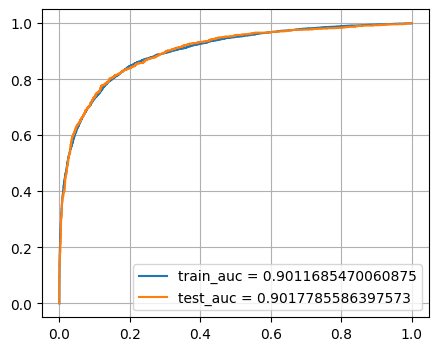

 best Thershold is -  0.5
Maximum value of tpr*(1-fpr) is -  0.68


In [312]:
l = [0.5,0.5]
estimator = MultinomialNB(alpha=neigh.best_params_['alpha'],class_prior = l,fit_prior = False)
estimator.fit(x_train,y_train)

y_train_prob = estimator.predict_proba(x_train)[:,1]
y_test_prob  = estimator.predict_proba(x_test)[:,1]

train_fpr,train_tpr, train_thershold = roc_curve(y_train,y_train_prob)
test_fpr, test_tpr,  test_thershold  = roc_curve(y_test,y_test_prob)

plt.figure(figsize=(5,4))
plt.plot(train_fpr, train_tpr, label = "train_auc = "+str(auc(train_fpr,train_tpr)))
plt.plot(test_fpr,  test_tpr,  label = "test_auc = "+str(auc(test_fpr,  test_tpr)))
plt.legend()
plt.grid()
plt.show()

thershold = train_thershold[np.argmax(train_tpr*(1-train_fpr))]
print(" best Thershold is - ", round(thershold,2))
print('Maximum value of tpr*(1-fpr) is - ',round(max(train_tpr*(1-train_fpr)),2))

# Confusion Matrix evaluation - Without Thershold Value

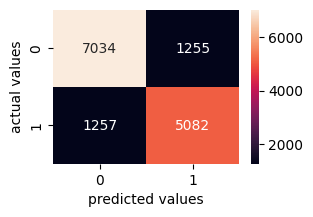

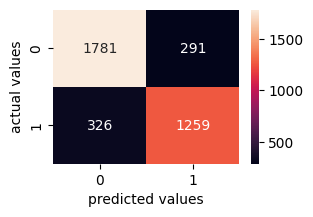

In [313]:
y_train_pred = estimator.predict(x_train)
y_test_pred  = estimator.predict(x_test)
plt.figure(figsize= (3,2))
sns.heatmap(confusion_matrix(y_train, y_train_pred), annot=True,fmt='d')
plt.ylabel('actual values')
plt.xlabel('predicted values')
plt.show()
plt.figure(figsize= (3,2))
sns.heatmap(confusion_matrix(y_test, y_test_pred)  ,annot=True,fmt='d')
plt.ylabel('actual values')
plt.xlabel('predicted values')
plt.show()

# Confusion Matrix evaluation - Thershold Value

In [314]:
predictions_train = []
for i in y_train_prob:
  if i>= thershold:
    predictions_train.append(1)
  else:
    predictions_train.append(0)
    
predictions_test = []
for i in y_test_prob:
  if i>= thershold:
    predictions_test.append(1)
  else:
    predictions_test.append(0)

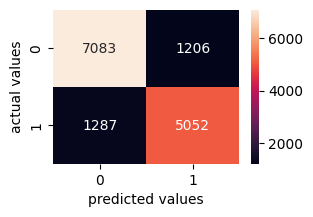

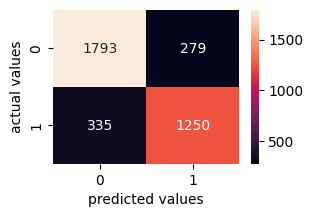

In [315]:
plt.figure(figsize= (3,2))
sns.heatmap(confusion_matrix(y_train, predictions_train), annot=True,fmt='d')
plt.ylabel('actual values')
plt.xlabel('predicted values')
plt.show()
plt.figure(figsize= (3,2))
sns.heatmap(confusion_matrix(y_test, predictions_test )  ,annot=True,fmt='d')
plt.ylabel('actual values')
plt.xlabel('predicted values')
plt.show()